In [1]:
# import packages
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
from scipy.signal import find_peaks, freqs, peak_widths

In [2]:
def data_loader(path):
    """
    DATA LOADER USING GENFROMTXT
    
    How to call:
    path = 'some/path/to/directory'
    array_name = data_loader(path)
    
    Parameters:
    path = string path to file
    
    Function:
    Will return an array with desired data
    """
    
    return np.genfromtxt(path, names=True, skip_header=5)

def profile_loader(path, array_name, sim_name):
    """
    PROFILE DATA LOADER USING GENFROMTXT
    
    How to call:
    path = 'some/path/to/directory'
    array_name = []
    profile_loader(path, array_name, sim_name)
    
    Parameters:
    path       = string path to desired directory
    array_name = name of initialized array
    sim_name   = name of sim/experiment
    
    Details:
    glob.glob     = easily find desired files
    sorted(, key) = order files ascending
    replace       = create name for each profile
    
    Array indexing [][][]:
    array_name[i][0]             = sim name profile#
    array_name[i][1].dtype       = array with profile headers
    array_name[i][1]['quantity'] = array of desired quanitity from specified profile
    
    Function:
    Will return return an array with MESA profiles
    """
    
    for file in sorted(glob.glob(path + 'profile*.data'), key=os.path.getmtime):
        array_name.append([file.replace(path, sim_name).replace('.data', ''), 
                           data_loader(file)])
    return array_name

# Model Parameters

Model | $L$ | $\dot{M}$ | $$Q_b$$ | $X$ | $Z$ | $R$
:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:
A | asdf | 0.0513 | 0.1 | 0.7 | 0.02 | 1.12
E | asdf | 0.9000 | 0.1 | 0.7 | 0.02 | 1.12
F | asdf | 0.1700 | 0.1 | 0.7 | 0.02 | 1.12
FA | asdf | 0.0513 | 0.5 | 0.7 | 0.02 | 1.12
FE | asdf | 0.0900 | 0.5 | 0.7 | 0.02 | 1.12
FF | asdf | 0.1700 | 0.5 | 0.7 | 0.02 | 1.12
G | asdf | 0.0513 | 1.0 | 0.7 | 0.02 | 1.12
K | asdf | 0.0900 | 1.0 | 0.7 | 0.02 | 1.12
L | asdf | 0.1700 | 1.0 | 0.7 | 0.02 | 1.12

In [3]:
# path to history
path_history_modA = './final_project/LOGS_modA/history.data'
path_history_modE = './final_project/LOGS_modE/history.data'
path_history_modF = './final_project/LOGS_modF/history.data'
path_history_modFA = './final_project/LOGS_modFA/history.data'
path_history_modFE = './final_project/LOGS_modFE/history.data'
path_history_modFF = './final_project/LOGS_modFF/history.data'
path_history_modG = './final_project/LOGS_modG/history.data'
path_history_modK = './final_project/LOGS_modK/history.data'
path_history_modL = './final_project/LOGS_modL/history.data'

path_history_modA2 = './final_project/LOGS_modA2/history.data'
path_history_modE2 = './final_project/LOGS_modE2/history.data'
path_history_modF2 = './final_project/LOGS_modF2/history.data'
path_history_modFA2 = './final_project/LOGS_modFA2/history.data'
path_history_modFE2 = './final_project/LOGS_modFE2/history.data'
path_history_modFF2 = './final_project/LOGS_modFF2/history.data'
path_history_modG2 = './final_project/LOGS_modG2/history.data'
path_history_modK2 = './final_project/LOGS_modK2/history.data'
path_history_modL2 = './final_project/LOGS_modL2/history.data'

In [4]:
# load history files
history_modA = data_loader(path_history_modA)
history_modE = data_loader(path_history_modE)
history_modF = data_loader(path_history_modF)
history_modFA = data_loader(path_history_modFA)
history_modFE = data_loader(path_history_modFE)
history_modFF = data_loader(path_history_modFF)
history_modG = data_loader(path_history_modG)
history_modK = data_loader(path_history_modK)
history_modL = data_loader(path_history_modL)

history_modA2 = data_loader(path_history_modA2)
history_modE2 = data_loader(path_history_modE2)
history_modF2 = data_loader(path_history_modF2)
history_modFA2 = data_loader(path_history_modFA2)
history_modFE2 = data_loader(path_history_modFE2)
history_modFF2 = data_loader(path_history_modFF2)
history_modG2 = data_loader(path_history_modG2)
history_modK2 = data_loader(path_history_modK2)
history_modL2 = data_loader(path_history_modL2)

# check history headers
print('history headers: \n', history_modA[0].dtype)

history headers: 
 [('model_number', '<f8'), ('star_age', '<f8'), ('star_mass', '<f8'), ('log_dt', '<f8'), ('num_zones', '<f8'), ('conv_mx1_top', '<f8'), ('conv_mx1_bot', '<f8'), ('conv_mx2_top', '<f8'), ('conv_mx2_bot', '<f8'), ('mx1_top', '<f8'), ('mx1_bot', '<f8'), ('mx2_top', '<f8'), ('mx2_bot', '<f8'), ('epsnuc_M_1', '<f8'), ('epsnuc_M_2', '<f8'), ('epsnuc_M_3', '<f8'), ('epsnuc_M_4', '<f8'), ('epsnuc_M_5', '<f8'), ('epsnuc_M_6', '<f8'), ('epsnuc_M_7', '<f8'), ('epsnuc_M_8', '<f8'), ('he_core_mass', '<f8'), ('c_core_mass', '<f8'), ('o_core_mass', '<f8'), ('si_core_mass', '<f8'), ('fe_core_mass', '<f8'), ('envelope_mass', '<f8'), ('envelope_fraction_left', '<f8'), ('log_LH', '<f8'), ('log_LHe', '<f8'), ('log_L', '<f8'), ('log_Lneu', '<f8'), ('log_Teff', '<f8'), ('log_R', '<f8'), ('log_g', '<f8'), ('log_center_T', '<f8'), ('log_center_Rho', '<f8'), ('log_center_P', '<f8'), ('center_degeneracy', '<f8'), ('center_ye', '<f8'), ('max_eps_h', '<f8'), ('max_eps_h_lgT', '<f8'), ('max_eps_h

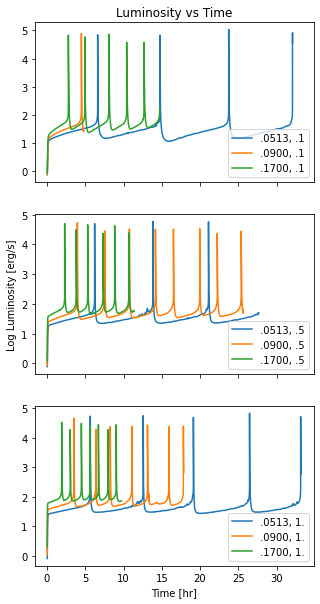

In [245]:
fig, ax = plt.subplots(3, sharex=True, figsize=(5, 10))
ax[0].plot(history_modA['star_age_hr'], history_modA['log_L'], label='.0513, .1')
ax[0].plot(history_modE['star_age_hr'], history_modE['log_L'], label='.0900, .1')
ax[0].plot(history_modF['star_age_hr'], history_modF['log_L'], label='.1700, .1')
ax[0].set_title('Luminosity vs Time')
ax[0].legend(loc='lower right')

ax[1].plot(history_modFA['star_age_hr'], history_modFA['log_L'], label='.0513, .5')
ax[1].plot(history_modFE['star_age_hr'], history_modFE['log_L'], label='.0900, .5')
ax[1].plot(history_modFF['star_age_hr'], history_modFF['log_L'], label='.1700, .5')
ax[1].set_ylabel('Log Luminosity [erg/s]')
ax[1].legend(loc='lower right')

ax[2].plot(history_modG['star_age_hr'], history_modG['log_L'], label='.0513, 1.')
ax[2].plot(history_modK['star_age_hr'], history_modK['log_L'], label='.0900, 1.')
ax[2].plot(history_modL['star_age_hr'], history_modL['log_L'], label='.1700, 1.')
ax[2].set_xlabel('Time [hr]')
ax[2].legend(loc='lower right')

fig.savefig('lum_v_time_same_Qb.png')

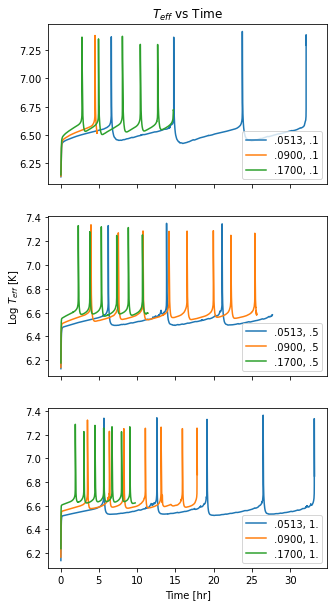

In [257]:
fig, ax = plt.subplots(3, sharex=True, figsize=(5, 10))
ax[0].plot(history_modA['star_age_hr'], history_modA['log_Teff'], label='.0513, .1')
ax[0].plot(history_modE['star_age_hr'], history_modE['log_Teff'], label='.0900, .1')
ax[0].plot(history_modF['star_age_hr'], history_modF['log_Teff'], label='.1700, .1')
ax[0].set_title('$T_{eff}$ vs Time')
ax[0].legend(loc='lower right')

ax[1].plot(history_modFA['star_age_hr'], history_modFA['log_Teff'], label='.0513, .5')
ax[1].plot(history_modFE['star_age_hr'], history_modFE['log_Teff'], label='.0900, .5')
ax[1].plot(history_modFF['star_age_hr'], history_modFF['log_Teff'], label='.1700, .5')
ax[1].set_ylabel('Log $T_{eff}$ [K]')
ax[1].legend(loc='lower right')

ax[2].plot(history_modG['star_age_hr'], history_modG['log_Teff'], label='.0513, 1.')
ax[2].plot(history_modK['star_age_hr'], history_modK['log_Teff'], label='.0900, 1.')
ax[2].plot(history_modL['star_age_hr'], history_modL['log_Teff'], label='.1700, 1.')
ax[2].set_xlabel('Time [hr]')
ax[2].legend(loc='lower right')

fig.savefig('teff_v_time_same_Qb.png')

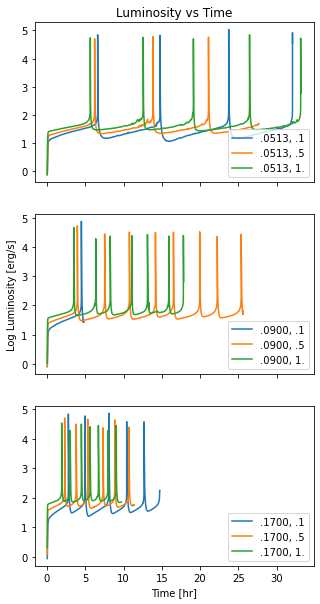

In [243]:
fig, ax = plt.subplots(3, sharex=True, figsize=(5, 10))
ax[0].plot(history_modA['star_age_hr'], history_modA['log_L'], label='.0513, .1')
ax[0].plot(history_modFA['star_age_hr'], history_modFA['log_L'], label='.0513, .5')
ax[0].plot(history_modG['star_age_hr'], history_modG['log_L'], label='.0513, 1.')
ax[0].set_title('Luminosity vs Time')
ax[0].legend(loc='lower right')

ax[1].plot(history_modE['star_age_hr'], history_modE['log_L'], label='.0900, .1')
ax[1].plot(history_modFE['star_age_hr'], history_modFE['log_L'], label='.0900, .5')
ax[1].plot(history_modK['star_age_hr'], history_modK['log_L'], label='.0900, 1.')
ax[1].set_ylabel('Log Luminosity [erg/s]')
ax[1].legend(loc='lower right')

ax[2].plot(history_modF['star_age_hr'], history_modF['log_L'], label='.1700, .1')
ax[2].plot(history_modFF['star_age_hr'], history_modFF['log_L'], label='.1700, .5')
ax[2].plot(history_modL['star_age_hr'], history_modL['log_L'], label='.1700, 1.')
ax[2].set_xlabel('Time [hr]')
ax[2].legend(loc='lower right')

fig.savefig('lum_v_time_same_Mdot.png')

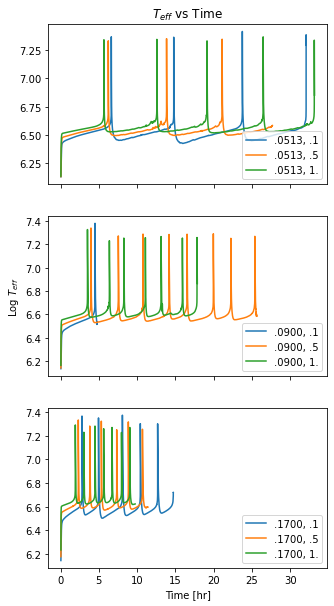

In [258]:
fig, ax = plt.subplots(3, sharex=True, figsize=(5, 10))
ax[0].plot(history_modA['star_age_hr'], history_modA['log_Teff'], label='.0513, .1')
ax[0].plot(history_modFA['star_age_hr'], history_modFA['log_Teff'], label='.0513, .5')
ax[0].plot(history_modG['star_age_hr'], history_modG['log_Teff'], label='.0513, 1.')
ax[0].set_title('$T_{eff}$ vs Time')
ax[0].legend(loc='lower right')

ax[1].plot(history_modE['star_age_hr'], history_modE['log_Teff'], label='.0900, .1')
ax[1].plot(history_modFE['star_age_hr'], history_modFE['log_Teff'], label='.0900, .5')
ax[1].plot(history_modK['star_age_hr'], history_modK['log_Teff'], label='.0900, 1.')
ax[1].set_ylabel('Log $T_{eff}$')
ax[1].legend(loc='lower right')

ax[2].plot(history_modF['star_age_hr'], history_modF['log_Teff'], label='.1700, .1')
ax[2].plot(history_modFF['star_age_hr'], history_modFF['log_Teff'], label='.1700, .5')
ax[2].plot(history_modL['star_age_hr'], history_modL['log_Teff'], label='.1700, 1.')
ax[2].set_xlabel('Time [hr]')
ax[2].legend(loc='lower right')

fig.savefig('teff_v_time_same_Mdot.png')

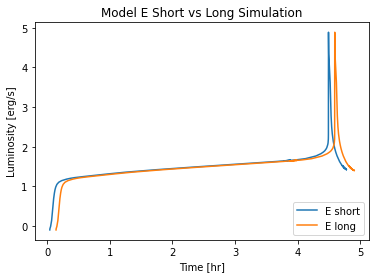

In [58]:
plt.plot(history_modE['star_age_hr'], history_modE['log_L'], label='E short')
plt.plot(.1 + history_modE2['star_age_hr'], history_modE2['log_L'], label='E long')
plt.title('Model E Short vs Long Simulation')
plt.xlabel('Time [hr]')
plt.ylabel('Luminosity [erg/s]')
plt.legend(loc='lower right')
plt.savefig('comp_modE.png')
plt.show()

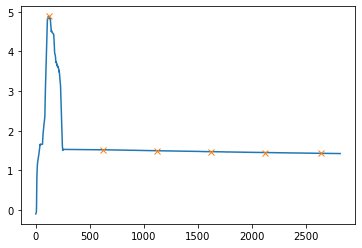

In [229]:
peaks, _ = find_peaks(history_modE['log_L'], distance=500)
plt.plot(history_modE['log_L'])
plt.plot(peaks, history_modE['log_L'][peaks], "x")

In [230]:
peaks_modA, _ = find_peaks(history_modA['log_L'], distance=200)
peaks_modE, _ = find_peaks(history_modE['log_L'], distance=500)
peaks_modF, _ = find_peaks(history_modF['log_L'], distance=200)
peaks_modFA, _ = find_peaks(history_modFA['log_L'], distance=300)
peaks_modFE, _ = find_peaks(history_modFE['log_L'], distance=200)
peaks_modFF, _ = find_peaks(history_modFF['log_L'], distance=200)
peaks_modG, _ = find_peaks(history_modG['log_L'], distance=200)
peaks_modK, _ = find_peaks(history_modK['log_L'], distance=190)
peaks_modL, _ = find_peaks(history_modL['log_L'], distance=150)

In [231]:
per_modA = np.diff(history_modA['star_age_hr'][peaks_modA])
per_modE = np.diff(history_modE['star_age_hr'][peaks_modE])
per_modF = np.diff(history_modF['star_age_hr'][peaks_modF])
per_modFA = np.diff(history_modFA['star_age_hr'][peaks_modFA])
per_modFE = np.diff(history_modFE['star_age_hr'][peaks_modFE])
per_modFF = np.diff(history_modFF['star_age_hr'][peaks_modFF])
per_modG = np.diff(history_modG['star_age_hr'][peaks_modG])
per_modK = np.diff(history_modK['star_age_hr'][peaks_modK])
per_modL = np.diff(history_modL['star_age_hr'][peaks_modL])

In [232]:
print(np.mean(per_modA))
print(np.mean(per_modE))
print(np.mean(per_modF[:5]))
print(np.mean(per_modFA[:4]))
print(np.mean(per_modFE[:8]))
print(np.mean(per_modFF[:6]))
print(np.mean(per_modG))
print(np.mean(per_modK))
print(np.mean(per_modL))

8.486573428578327
0.05609520787416855
2.3864306682069736
7.439393548529855
2.702708315229119
1.5083388550936734
6.872433396521943
2.3858220176943754
1.1870471153712228


In [223]:
((2.4-1.5) + (1.5-1.2)) / 2

0.6

In [219]:
2.7-1.5

1.2000000000000002

In [220]:
2.6 - 1.2

1.4000000000000001

In [234]:
print(np.max(history_modE['star_age_hr']))
print(np.max(history_modE2['star_age_hr']))

4.781983146812489
4.8064174500354175


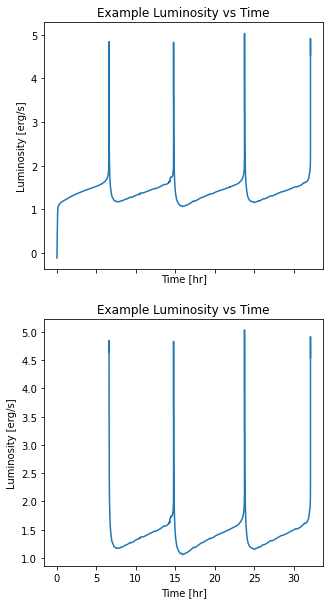

In [29]:
fig, ax = plt.subplots(2, sharex=True, figsize=(5, 10))
ax[0].plot(history_modA['star_age_hr'], history_modA['log_L'])
ax[0].set_title('Example Luminosity vs Time')
ax[0].set_xlabel('Time [hr]')
ax[0].set_ylabel('Luminosity [erg/s]')

ax[1].plot(history_modA['star_age_hr'][100:], history_modA['log_L'][100:])
ax[1].set_title('Example Luminosity vs Time')
ax[1].set_xlabel('Time [hr]')
ax[1].set_ylabel('Luminosity [erg/s]')

fig.savefig('example_lum_v_time.png')